In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Plot style
import numpy as np

In [3]:
data = pd.DataFrame(
{
    'mass':   [4, 5, 5, 5, 6, 7, 11, 11, 13, 13],  
    'height': [2, 1, 2, 3, 2, 4, 8,  10, 8,  10], 
    'label':  ['cat']*5 + ['dog']*5
}, 
    columns = ['mass', 'height', 'label'] # maintains column order
)
data

,mass,height,label
0,4,2,cat
1,5,1,cat
2,5,2,cat
3,5,3,cat
4,6,2,cat
5,7,4,dog
6,11,8,dog
7,11,10,dog
8,13,8,dog
9,13,10,dog


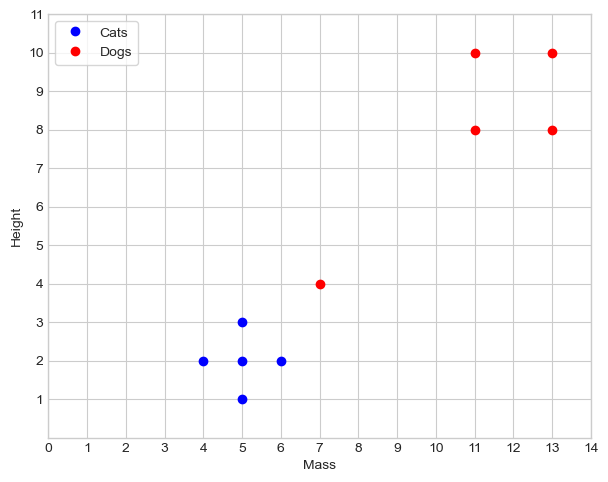

In [4]:
def plot_cats_vs_dogs(data):
    # Specify figure parameters
    fig, ax = plt.subplots(figsize=(7, 5.5))
    
    # Data to plot
    
    ax.plot(data.loc[data.label == 'cat', 'mass'],
            data.loc[data.label == 'cat', 'height'], 'bo', label='Cats') 
    ax.plot(data.loc[data.label == 'dog', 'mass'],
            data.loc[data.label == 'dog', 'height'], 'ro', label='Dogs')

    # Specify axes parameters
    ax.set_xticks(list(range(0, 15)))
    ax.set_yticks(list(range(1, 12)))
    ax.set_xlim(0, 14)
    ax.set_ylim(0, 11)

    # Axis labels
    ax.set_xlabel('Mass')
    ax.set_ylabel('Height')
    
    return ax

# Show the plot inline
plot_cats_vs_dogs(data)
plt.legend(markerscale=1, frameon=True)
plt.show()

K-nearest neighbours algorithm makes decision for each point based on nearest neighbours' classes. We can visualize decision boundaries to compare classification with different K values.

We have this unknown point (marked with cross). In which class does it belong using 1-NN, 3-NN, 5-NN, etc.?

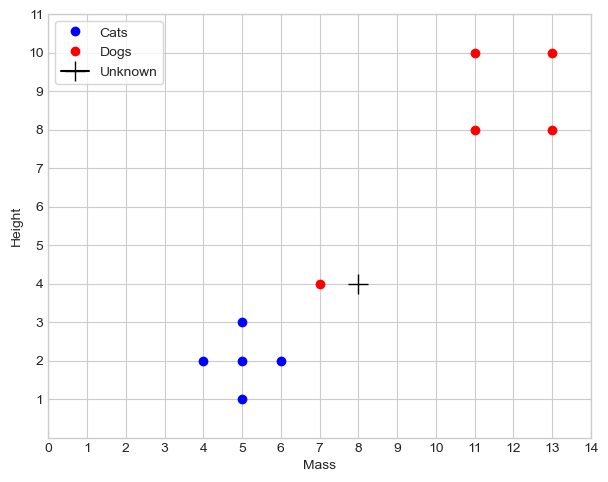

In [5]:
plot_cats_vs_dogs(data)
plt.plot(*[8,4], color='black', marker='+', markersize=15, label='Unknown')
plt.legend(markerscale=1, frameon=True)
plt.show()

In [7]:
def create_grid():
    x = np.arange(0, 15, 0.1)
    y = np.arange(0, 12, 0.1)
    xx, yy = np.meshgrid(x, y)
    # Generates all possible combinations
    X_grid = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()}) 
    return X_grid

def plot_model(ax, X_train, y_train, X_grid, model):
    y_pred = model.predict(X_grid)
    
    X_grid[y_pred=='dog'].plot(x='x', y='y', kind='scatter', s=20, color='red', ax=ax, alpha=0.1, zorder=-1)
    X_grid[y_pred=='cat'].plot(x='x', y='y', kind='scatter', s=20, color='blue', ax=ax, alpha=0.1, zorder=-1)
    
    X_train[y_train=='dog'].plot(x='x', y='y', kind='scatter', s=40, color='pink', ax=ax, alpha=0.1, zorder=-1)
    X_train[y_train=='cat'].plot(x='x', y='y', kind='scatter', s=40, color='lightblue', ax=ax, alpha=0.1, zorder=-1)

In [8]:
def plot_decision_boundaries(model, data):
    X_train = data.iloc[:, :2]
    X_train.columns = ['x', 'y']
    y_train = data.label
    ax = plot_cats_vs_dogs(data)
    X_grid = create_grid()
    model = model.fit(X_train, y_train)
    plot_model(ax, X_train, y_train, X_grid, model)

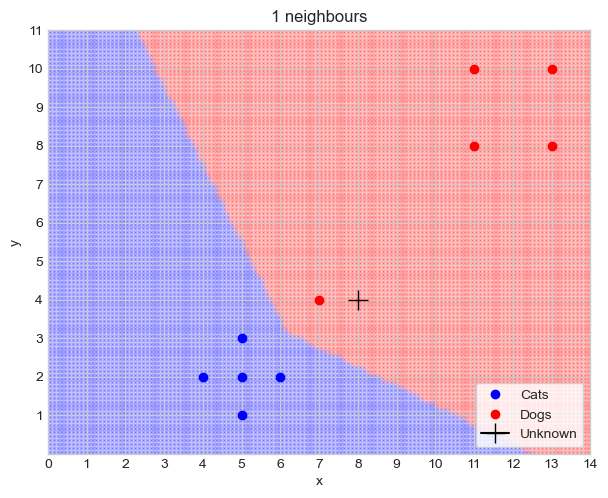

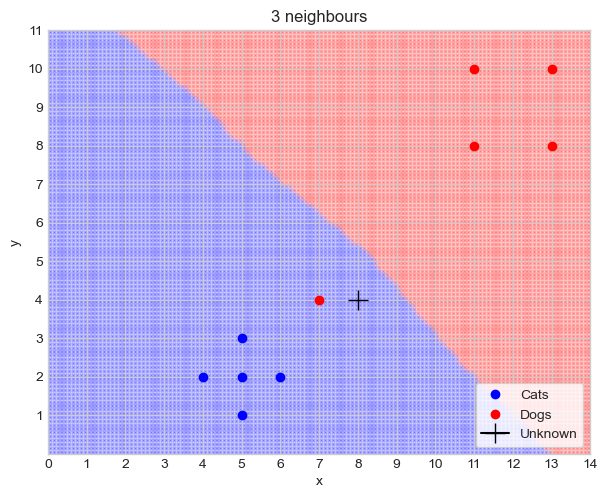

AttributeError: 'Flags' object has no attribute 'c_contiguous'

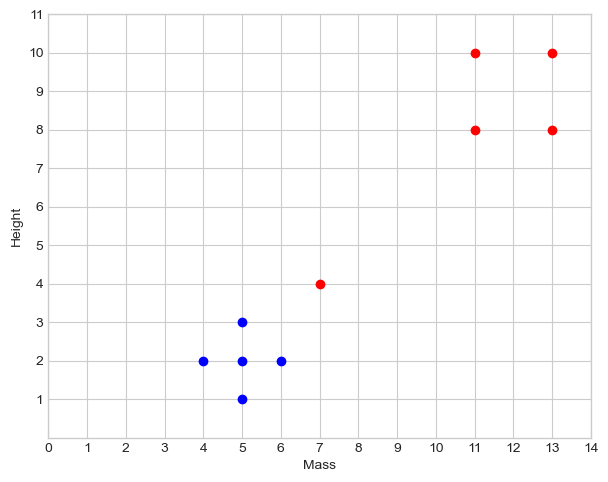

In [14]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1, 11, 2):
    model = KNeighborsClassifier(n_neighbors=i)
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='Unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{i} neighbours'.format(i=i))
    plt.show()

In the KNeighborsClassifier, the default metric is minkowski, and with p=2 it is equivalent to the standard Euclidean distance. However, we can also use some other distance measures.

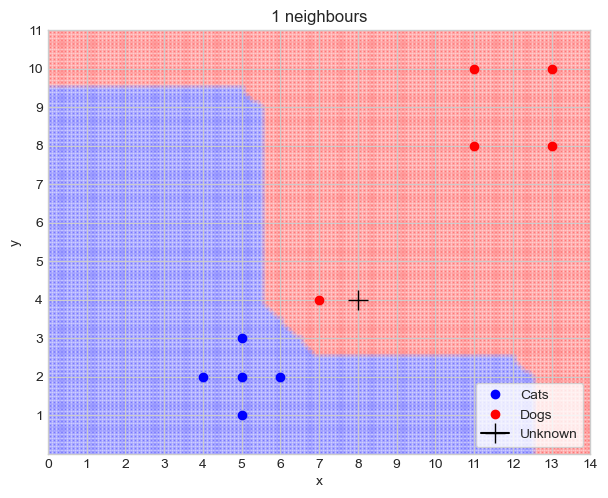

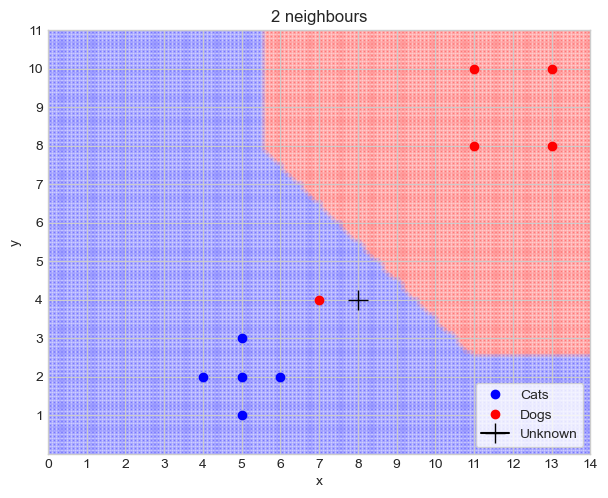

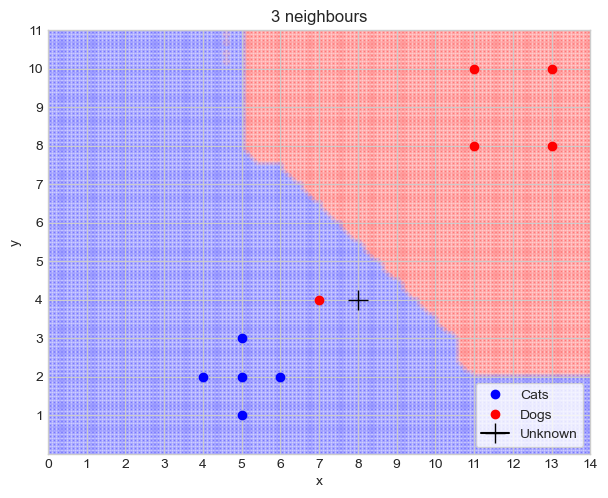

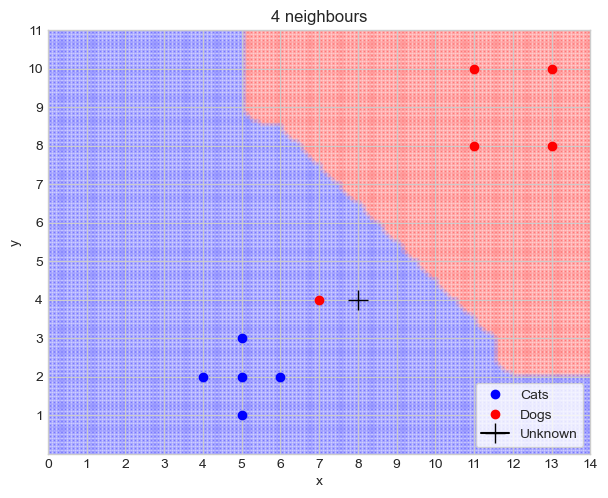

AttributeError: 'Flags' object has no attribute 'c_contiguous'

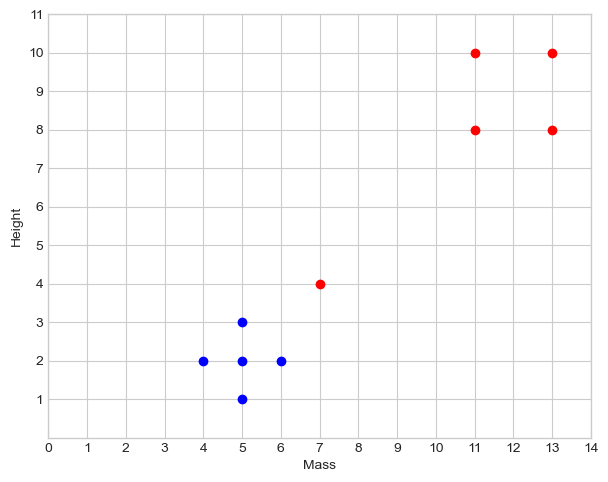

In [12]:
for i in range(1, 10):
    model = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='Unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{i} neighbours'.format(i=i))
    plt.show()

We can use weights to weight each neighbour's vote inversely to its distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

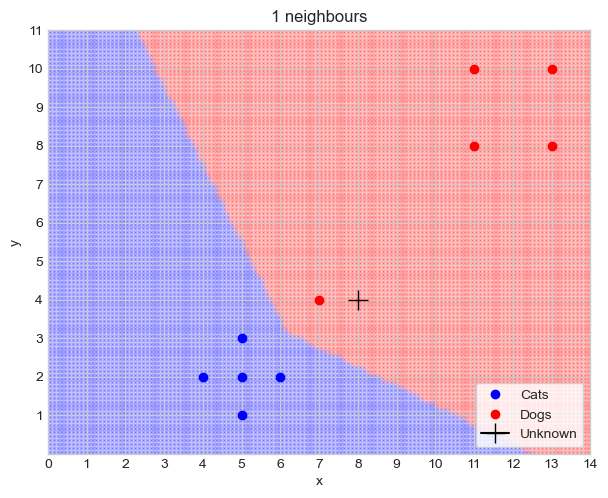

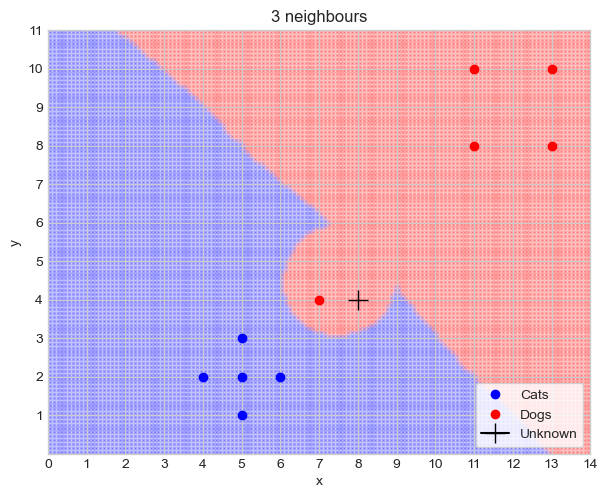

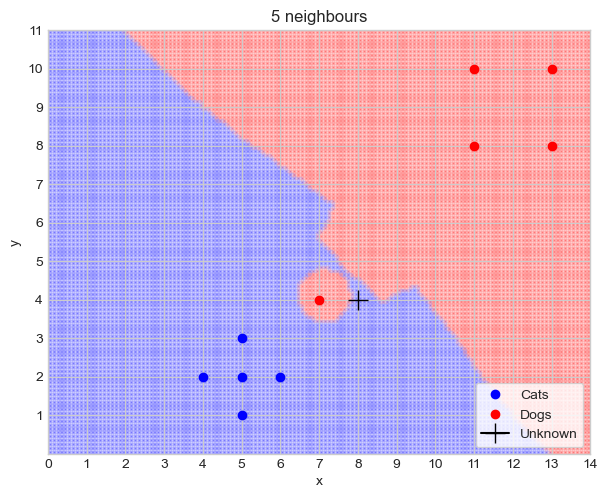

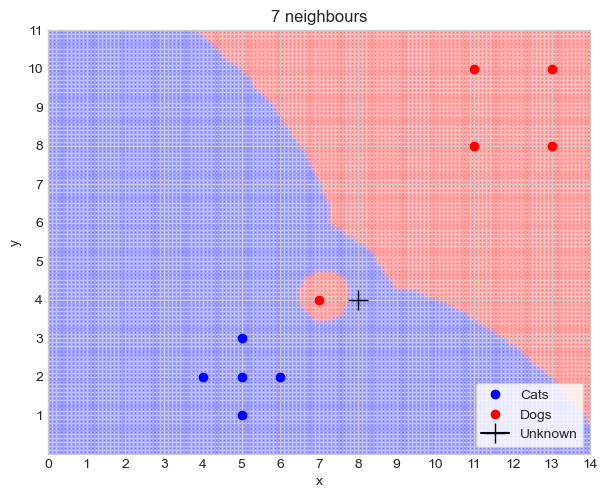

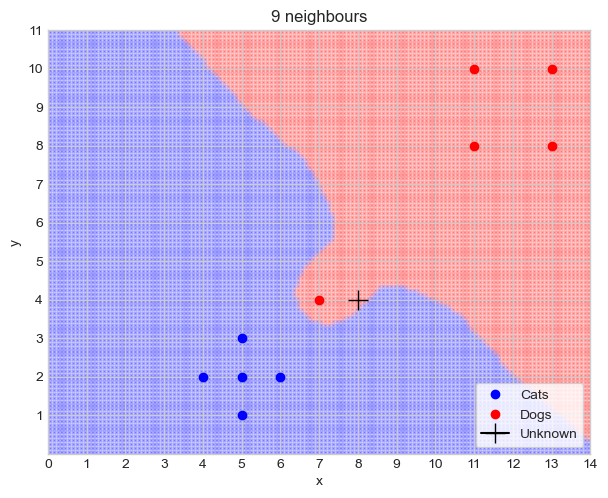

In [13]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='Unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{i} neighbours'.format(i=i))
    plt.show()

Now, let's use distance weighting and Manhattan distance instead of Euclidean distance.

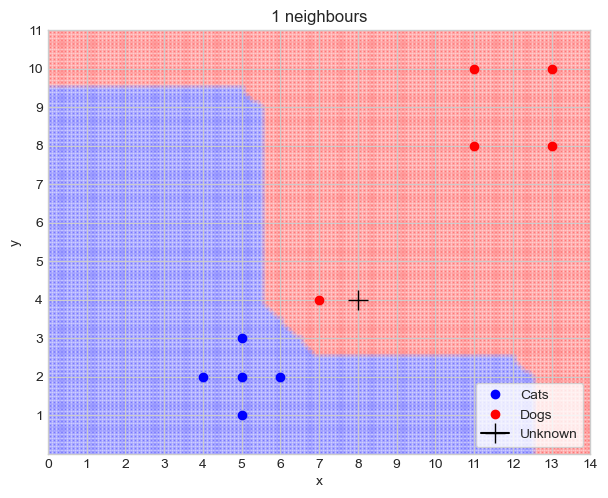

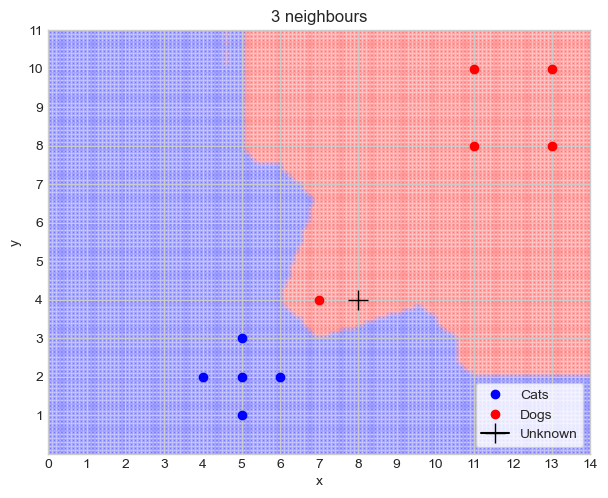

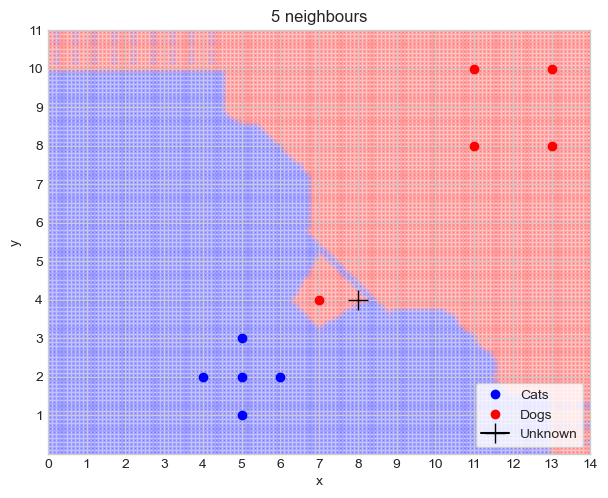

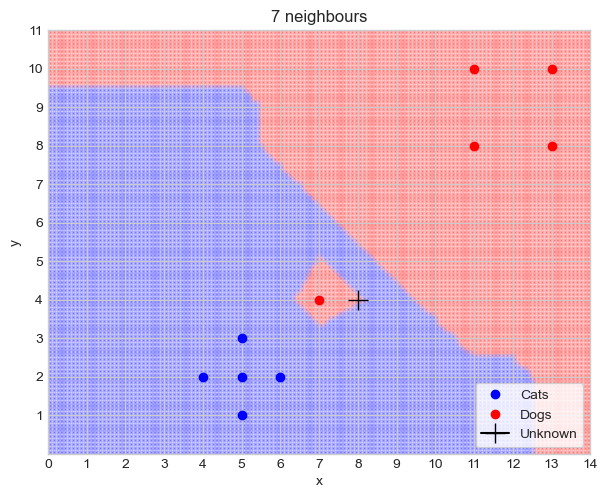

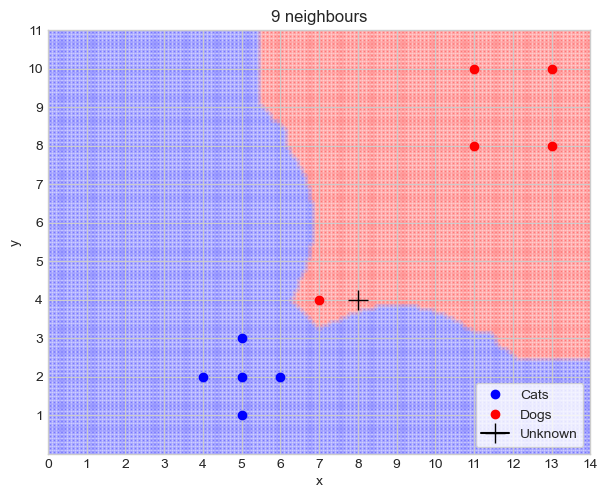

In [15]:
for i in range(1, 10, 2):
    model = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='manhattan')
    plot_decision_boundaries(model, data)
    plt.plot(*[8,4], color='black', marker='+', markersize=15, label='Unknown')
    plt.legend(markerscale=1, frameon=True, loc='lower right')
    plt.title('{i} neighbours'.format(i=i))
    plt.show()